In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [41]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# note that indices are offset by 3
# indices 0, 1 and 2 are reserved for "padding", "start of sequence" and "unknown"
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[0]

3

In [10]:
train_data.shape

(8982,)

In [14]:
train_data.ndim

1

In [9]:
train_labels.shape

(8982,)

### Vectorizing data (one-hot encoding the training data)

In [23]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    print("Shape sequences: ", sequences.shape)
    print("Shape results: ", results.shape)

    for i, sequence in enumerate(sequences):
        for index in sequence:
            results[i, index] = 1.
    return results

# our vectorized training data
x_train = vectorize_sequences(train_data)
# our vectorized test data
x_test = vectorize_sequences(test_data)

Shape sequences:  (8982,)
Shape results:  (8982, 10000)
Shape sequences:  (2246,)
Shape results:  (2246, 10000)


In [24]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

### Vectorizing labels (one-hot encoding the labels)

In [25]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [33]:
one_hot_test_labels

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Built-in way of doing one-hot encoding with keras

In [29]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [32]:
one_hot_test_labels

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Model definition

In [34]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [35]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Set aside some validation data

In [37]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Train the network

In [38]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 10s - loss: 2.5304 - acc: 0.4964 - val_loss: 1.7173 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 7s - loss: 1.4425 - acc: 0.6883 - val_loss: 1.3436 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 7s - loss: 1.0929 - acc: 0.7657 - val_loss: 1.1702 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 7s - loss: 0.8679 - acc: 0.8158 - val_loss: 1.0806 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 8s - loss: 0.7015 - acc: 0.8480 - val_loss: 0.9839 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 7s - loss: 0.5657 - acc: 0.8792 - val_loss: 0.9406 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 7s - loss: 0.4573 - acc: 0.9040 - val_loss: 0.9084 - val_acc: 0.8020
Epoch 8/20
7982/7982 [==============================] - 7s - loss: 0.3690 - 

### Plotting the training and validation loss

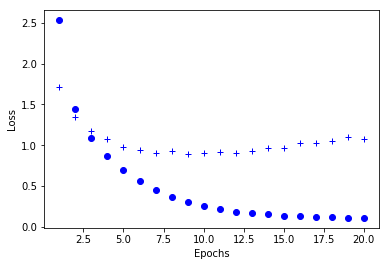

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

### Plotting the training and validation accuracy

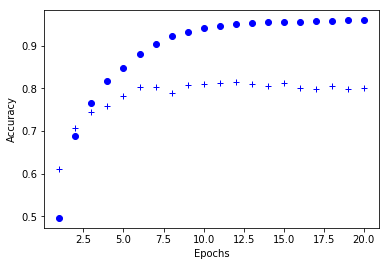

In [42]:
plt.clf() # clear figure

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

### Let's try 9 epochs as it's overfitting, but this time over the full training set

In [87]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          one_hot_train_labels,
          epochs=9,
          batch_size=512,
          validation_data=(x_test, one_hot_test_labels))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 4s - loss: 2.5986 - acc: 0.5323 - val_loss: 1.7741 - val_acc: 0.6505
Epoch 2/9
8982/8982 [==============================] - 5s - loss: 1.4055 - acc: 0.7088 - val_loss: 1.3165 - val_acc: 0.7039
Epoch 3/9
8982/8982 [==============================] - 6s - loss: 1.0012 - acc: 0.7886 - val_loss: 1.1346 - val_acc: 0.7484
Epoch 4/9
8982/8982 [==============================] - 6s - loss: 0.7746 - acc: 0.8401 - val_loss: 1.0303 - val_acc: 0.7663
Epoch 5/9
8982/8982 [==============================] - 7s - loss: 0.6072 - acc: 0.8773 - val_loss: 0.9766 - val_acc: 0.7809
Epoch 6/9
8982/8982 [==============================] - 7s - loss: 0.4827 - acc: 0.9011 - val_loss: 0.9435 - val_acc: 0.7890
Epoch 7/9
8982/8982 [==============================] - 7s - loss: 0.3933 - acc: 0.9162 - val_loss: 0.9525 - val_acc: 0.7876
Epoch 8/9
8982/8982 [==============================] - 7s - loss: 0.3238 - acc: 0.92

[0.94575634176775691, 0.79252003561887796]

In [88]:
model.metrics_names

['loss', 'acc']

In [89]:
dict(list(zip(model.metrics_names, results)))

{'acc': 0.79252003561887796, 'loss': 0.94575634176775691}

### Accuracy of a random baseline

In [58]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19723953695458593

### Predicting on new data

In [62]:
predictions = model.predict(x_test)
predictions.shape

(2246, 46)

### Because it's softmax it's coefficient totals to 1

In [66]:
np.sum(predictions[0])

0.99999994

In [67]:
np.argmax(predictions[0])

3

### Another way to handle / encode the labels and the loss is to cast them to an integer tensor

In [69]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [70]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [73]:
# Encoding the labels as integer arrays
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [77]:
y_train[0]

3

In [78]:
one_hot_train_labels[0]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

### We'll use sparse categorical crossentropy loss instead

In [95]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_test, y_test))
results = model.evaluate(x_test, y_test)

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 9s - loss: 0.1451 - acc: 0.9536 - val_loss: 1.2180 - val_acc: 0.7863
Epoch 2/9
8982/8982 [==============================] - 10s - loss: 0.1150 - acc: 0.9548 - val_loss: 1.2460 - val_acc: 0.7801
Epoch 3/9
8982/8982 [==============================] - 10s - loss: 0.1171 - acc: 0.9560 - val_loss: 1.2419 - val_acc: 0.7836
Epoch 4/9
8982/8982 [==============================] - 10s - loss: 0.1120 - acc: 0.9545 - val_loss: 1.2901 - val_acc: 0.7765
Epoch 5/9
8982/8982 [==============================] - 10s - loss: 0.1087 - acc: 0.9561 - val_loss: 1.2494 - val_acc: 0.7912
Epoch 6/9
8982/8982 [==============================] - 10s - loss: 0.1096 - acc: 0.9564 - val_loss: 1.3245 - val_acc: 0.7792
Epoch 7/9
8982/8982 [==============================] - 9s - loss: 0.1096 - acc: 0.9546 - val_loss: 1.2648 - val_acc: 0.7872
Epoch 8/9
8982/8982 [==============================] - 10s - loss: 0.1048 - acc

In [97]:
dict(list(zip(model.metrics_names, results)))

{'acc': 0.78183437224381325, 'loss': 1.3535090456662811}

In [98]:
new_predictions = model.predict(x_test)
new_predictions.shape

(2246, 46)

In [99]:
np.argmax(new_predictions[0])

3

### Effects of information bottle neck by reducing the number of hidden units to 8 instead of 64

In [102]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
          one_hot_train_labels,
          epochs=9,
          batch_size=512,
          validation_data=(x_test, one_hot_test_labels))

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 11s - loss: 3.3776 - acc: 0.0369 - val_loss: 2.8715 - val_acc: 0.2511
Epoch 2/9
8982/8982 [==============================] - 10s - loss: 2.3804 - acc: 0.5621 - val_loss: 2.0769 - val_acc: 0.6260
Epoch 3/9
8982/8982 [==============================] - 10s - loss: 1.6791 - acc: 0.6647 - val_loss: 1.6456 - val_acc: 0.6567
Epoch 4/9
8982/8982 [==============================] - 12s - loss: 1.3107 - acc: 0.6998 - val_loss: 1.4457 - val_acc: 0.6710
Epoch 5/9
8982/8982 [==============================] - 10s - loss: 1.1097 - acc: 0.7331 - val_loss: 1.3475 - val_acc: 0.6941
Epoch 6/9
8982/8982 [==============================] - 10s - loss: 0.9716 - acc: 0.7671 - val_loss: 1.2736 - val_acc: 0.7186
Epoch 7/9
8982/8982 [==============================] - 10s - loss: 0.8616 - acc: 0.7917 - val_loss: 1.2315 - val_acc: 0.7231
Epoch 8/9
8982/8982 [==============================] - 9s - loss: 0.7676 - ac

In [103]:
results = model.evaluate(x_test, one_hot_test_labels)

2144/2246 [===========================>..] - ETA: 0s

In [104]:
dict(list(zip(model.metrics_names, results)))

{'acc': 0.72796081926073231, 'loss': 1.1853839009336775}

### Trying with 128 unit

In [106]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                   one_hot_train_labels,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_test, one_hot_test_labels))

results = model.evaluate(x_test, one_hot_test_labels)
dict(list(zip(model.metrics_names, results)))

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 10s - loss: 2.1256 - acc: 0.5632 - val_loss: 1.4202 - val_acc: 0.6874
Epoch 2/9
8982/8982 [==============================] - 9s - loss: 1.0726 - acc: 0.7686 - val_loss: 1.1437 - val_acc: 0.7453
Epoch 3/9
8982/8982 [==============================] - 11s - loss: 0.7419 - acc: 0.8440 - val_loss: 0.9899 - val_acc: 0.7752
Epoch 4/9
8982/8982 [==============================] - 11s - loss: 0.5341 - acc: 0.8888 - val_loss: 0.9347 - val_acc: 0.7925
Epoch 5/9
8982/8982 [==============================] - 10s - loss: 0.3837 - acc: 0.9220 - val_loss: 0.9432 - val_acc: 0.7916
Epoch 6/9
8982/8982 [==============================] - 14s - loss: 0.3034 - acc: 0.9344 - val_loss: 1.0227 - val_acc: 0.7738
Epoch 7/9
8982/8982 [==============================] - 11s - loss: 0.2453 - acc: 0.9424 - val_loss: 0.9252 - val_acc: 0.8045
Epoch 8/9
8982/8982 [==============================] - 11s - loss: 0.2109 - ac

{'acc': 0.79563668747088367, 'loss': 1.020824116463122}

### Trying with 3 hidden layers of 128 hidden units each

In [107]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train,
                    one_hot_train_labels,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_test, one_hot_test_labels))

results = model.evaluate(x_test, one_hot_test_labels)
dict(list(zip(model.metrics_names, results)))

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 9s - loss: 2.8263 - acc: 0.3377 - val_loss: 1.9869 - val_acc: 0.3620
Epoch 2/9
8982/8982 [==============================] - 9s - loss: 1.5692 - acc: 0.3517 - val_loss: 1.4627 - val_acc: 0.3620
Epoch 3/9
8982/8982 [==============================] - 9s - loss: 1.2071 - acc: 0.3518 - val_loss: 1.3679 - val_acc: 0.3620
Epoch 4/9
8982/8982 [==============================] - 9s - loss: 0.9731 - acc: 0.4920 - val_loss: 1.0177 - val_acc: 0.7600
Epoch 5/9
8982/8982 [==============================] - 10s - loss: 0.5372 - acc: 0.8715 - val_loss: 0.9939 - val_acc: 0.7832
Epoch 6/9
8982/8982 [==============================] - 10s - loss: 0.4300 - acc: 0.8994 - val_loss: 0.9253 - val_acc: 0.8023
Epoch 7/9
8982/8982 [==============================] - 10s - loss: 0.2769 - acc: 0.9370 - val_loss: 1.0226 - val_acc: 0.7921
Epoch 8/9
8982/8982 [==============================] - 10s - loss: 0.2930 - acc: 

{'acc': 0.78005342837008429, 'loss': 1.1318295139981929}